# Assignment 4

## Problem 1: GRB Afterglow (15 pts)
This problem is a continuation of the lab that was done in class on March 1 (lab #7).
Download the file GRB_afterglow.dat from the canvas site or from
astrostatistics.psu.edu/datasets/GRB_afterglow.html.
You should read about this dataset in that webpage. Make sure you understand the two
exercises we conducted as part of the lab, then do the following:
Determine the best-fit of a line with a break (or changepoint) at $k$. The function looks
like this
$$Y = \beta_0 + \beta_1X + \beta_2(X - k)I\{X>k\} + \varepsilon,$$
where $I\{\cdot,\cdot\}$ is the indicator function such that 
$$I\{X>k\} = \begin{cases} 1 & \text{if $X > k$,} \\ 0 & \text{otherwise.} \end{cases}$$
In our case, $Y = \ln(F_x)$ and $X = \ln(t)$, where $F_x$ is the X-ray flux (in units of $10^{-11}$ erg/cm^2/s) and $t$ is time in seconds.

- (a) Fit the simple linear regression model (with errors) with a changepoint k=7. Give the results and plot the line over the data.
- (b) Do the same as in (a), but now with a changepoint k=8. Give the results and plot the line over the data.
- (c) Make a plot of the residuals for the fits done in (a) and (b). Use these plots and a measure of the degree of deviation between the points and the model to decide which of the two models is a better fit.

In [28]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [54]:
# PART A

def I(X, k):
    return 1 if X > k else 0

def changepointPlot(x, y, err, k):
    # Regression
    X = np.array([[1.0 / err[i],
                   x[i] / err[i],
                   (x[i] - k)*I(i, k) / err[i]] for i in range(len(data))])
    y_np = y / err
    beta, chi_sq = np.linalg.lstsq(X, y_np, rcond=-1)[:2]
    
    # Plots
#     plt.figure(dpi=300)
    plt.errorbar(x, y + x, yerr = err, fmt='x');
    
    t_sample = np.linspace(4, 13, 1000)
    indicator = [I(t,k) for t in t_sample]
    response = beta[0] + t_sample * (beta[1] + 1) + (t_sample - k) * indicator * beta[2]
#     print(respSonse)
    plt.plot(t_sample, response);
    
    return (t_sample, response)

## Import raw data
data = np.genfromtxt("GRB_afterglow.dat", skip_header = 2)
time = np.log(data[:, 0]) # time
flux = np.log(data[:, 1]) # flux
flux_err = data[:, 2] / data[:, 1] # error in flux

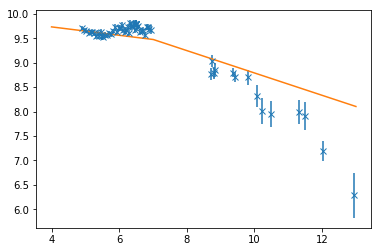

In [56]:
# Part A
model7 = changepointPlot(time, flux, flux_err, k = 7)

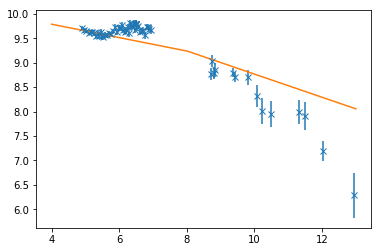

In [57]:
# Part B
model8 = changepointPlot(time, flux, flux_err, k = 8)

In [62]:
# Part C
for i,t in time:
    print(t)

TypeError: 'numpy.float64' object is not iterable